# Analyses of the results from requirements generation

In [26]:
# imports
import pandas as pd

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# read the excel file
df = pd.read_excel('./23__output_generated_analysis__J.xlsx')

df.columns = ['Standard', 'Section', 'Distance', 'Content', 'Generated', 'all_latency_identified','useful','hallucination', 'text well_written','Comment']

df.head()

,Standard,Section,Distance,Content,Generated,all_latency_identified,useful,hallucination,text well_written,Comment
0,23.008,<h3>3.14.10\tMaximum-Latency</h3>,0.095294,"['', 'Maximum Latency is defined in 3GPP\xa0TS...",The system shall ensure that the maximum late...,yes,yes,no,yes,The section contains three separate requiremen...
1,23.008,<h2>5.9\tArchitecture Enhancements for Service...,0.177985,"['', 'Table 5.9-1: Overview of data used for A...",The system shall provide an overview of data ...,yes,maybe,no,no,The section is a table --> not possible to sum...
2,23.222,<h3>8.15.1\tGeneral</h3>,0.152687,"['', 'The procedure in this subclause correspo...",The system shall provide an authentication pr...,yes,yes,no,so and so,original no of words vs generated: 54 vs 68 --...
3,23.222,<h3>8.14.1\tGeneral</h3>,0.152547,"['', 'The procedure in this subclause correspo...",The system shall provide an authentication pr...,yes,yes,no,so and so,original no of words vs generated: 49 vs 58 --...
4,23.222,<h3>8.16.1\tGeneral</h3>,0.150918,"['', 'The procedure in this subclause correspo...",The system shall provide an architecture that...,yes,yes,yes,no,a) original no of words vs generated: 73 vs 89...


In [21]:
# add a column that will count the number of "yes" in all_latency_identified, useful, text well_written
df['sum'] = df['all_latency_identified'].map({'yes': 1, 'no': 0}) + df['useful'].map({'yes': 1, 'no': 0}) + df['text well_written'].map({'yes': 1, 'no': 0}) + df['hallucination'].map({'yes': 0, 'no': 1})

# replace NaN with 0
df['sum'] = df['sum'].fillna(0)


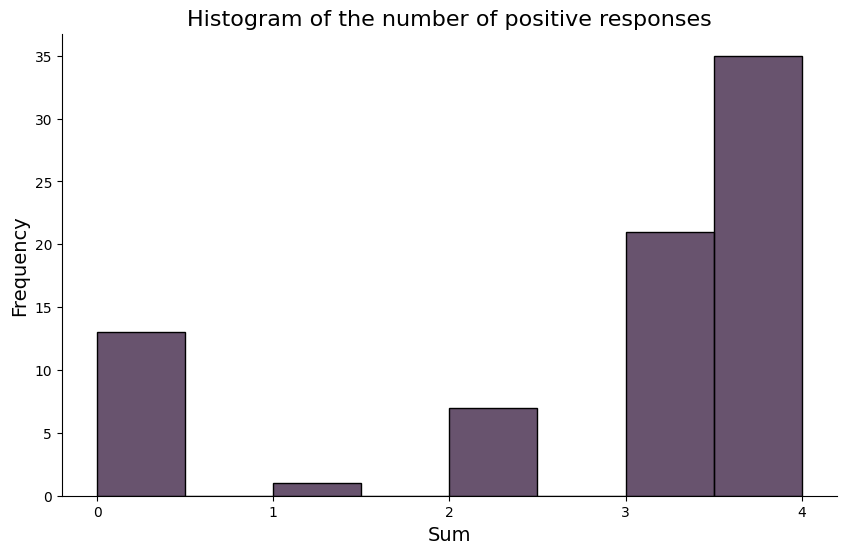

In [30]:
# create a color palette
palette = sns.color_palette("rocket")

# create a plot with a histogram
plt.figure(figsize=(10, 6))

sns.histplot(df['sum'], color=palette[0])

# set labels and title
plt.xlabel('Sum', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Histogram of the number of positive responses', fontsize=16)

# set x-axis labels
plt.xticks([0, 1, 2, 3, 4])

# remove top and right borders
sns.despine()

# show the plot
plt.show()

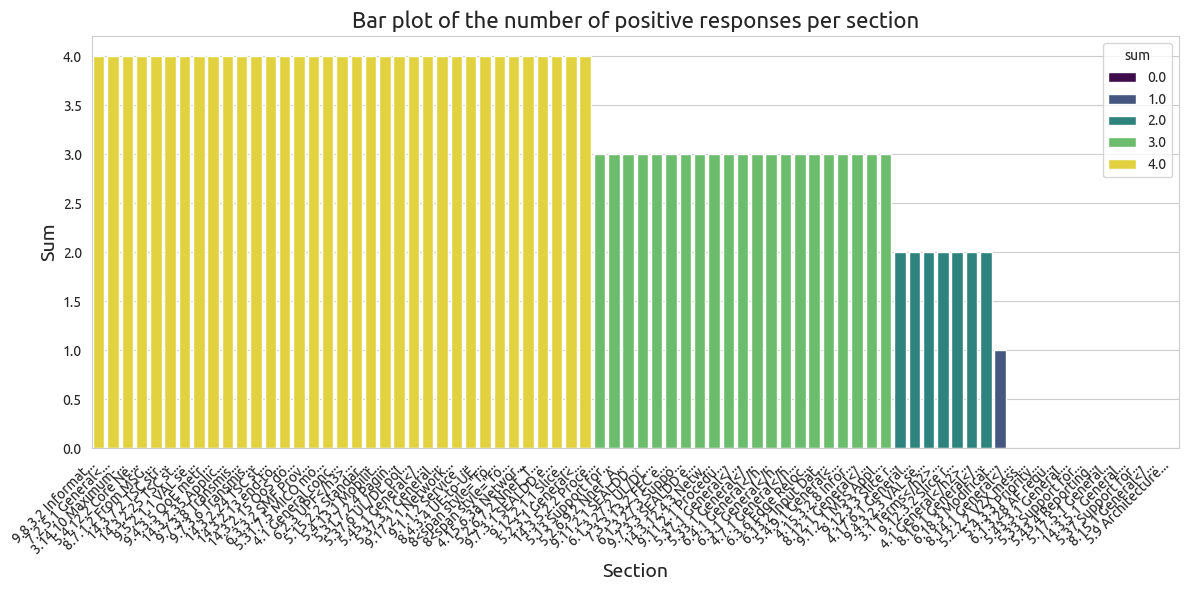

In [57]:
# Set the style of seaborn
sns.set_style("whitegrid")

# Set the font
plt.rcParams['font.family'] = 'Ubuntu'

# Sort the DataFrame by 'sum' in descending order
df = df.sort_values('sum', ascending=False)

# Create a bar plot
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x='Section', 
            y='sum', 
            data=df, 
            ax=ax, 
            palette='viridis', 
            hue='sum')

# Truncate x-axis labels after 10 characters
labels = [label.get_text()[4:20]+'...' for label in ax.get_xticklabels()]
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels, rotation=45, ha='right')

# Set labels and title
ax.set_xlabel('Section', fontsize=14)
ax.set_ylabel('Sum', fontsize=14)
ax.set_title('Bar plot of the number of positive responses per section', fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()

In [38]:
from matplotlib import font_manager

fonts = font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

print(fonts)

['/usr/share/fonts/truetype/ubuntu/Ubuntu-M.ttf', '/usr/share/fonts/truetype/ubuntu/Ubuntu-C.ttf', '/usr/share/fonts/truetype/ubuntu/Ubuntu-MI.ttf', '/usr/share/fonts/truetype/ubuntu/UbuntuMono-R.ttf', '/usr/share/fonts/truetype/ubuntu/Ubuntu-LI.ttf', '/usr/share/fonts/truetype/ubuntu/UbuntuMono-RI.ttf', '/usr/share/fonts/truetype/ubuntu/Ubuntu-Th.ttf', '/usr/share/fonts/truetype/ubuntu/Ubuntu-RI.ttf', '/usr/share/fonts/truetype/ubuntu/UbuntuMono-B.ttf', '/usr/share/fonts/truetype/ubuntu/Ubuntu-B.ttf', '/usr/share/fonts/truetype/ubuntu/Ubuntu-L.ttf', '/usr/share/fonts/truetype/ubuntu/Ubuntu-R.ttf', '/usr/share/fonts/truetype/ubuntu/UbuntuMono-BI.ttf', '/usr/share/fonts/truetype/ubuntu/Ubuntu-BI.ttf']
